In [7]:
import os
import shutil
from pathlib import Path

def merge_images(src_dir, dest_dir):
    # Ensure the destination directory exists
    Path(dest_dir).mkdir(parents=True, exist_ok=True)
    
    # Iterate over all the class folders in source directory
    for class_name in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_name)
        
        # If it's a directory (class folder), merge the images
        if os.path.isdir(class_path):
            # Create the same class folder in the destination directory
            dest_class_path = os.path.join(dest_dir, class_name)
            Path(dest_class_path).mkdir(parents=True, exist_ok=True)
            
            # Iterate through all images in the class folder
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                if os.path.isfile(img_path):
                    # Copy each image into the corresponding folder in the destination
                    shutil.copy(img_path, dest_class_path)

# Define the paths for 'train', 'test', and the merged 'data_merge' folder
train_dir = 'D:/pantio_m_cut/train'
test_dir = 'D:/pantio_m_cut/test'
data_merge_dir = 'data_merge'

# Merge images from train and test folders
merge_images(train_dir, data_merge_dir)
merge_images(test_dir, data_merge_dir)

print("Merging completed!")


Merging completed!


In [8]:
import os
import shutil
import random
from pathlib import Path
from tqdm import tqdm  # Import tqdm

def split_data(src_dir, dest_dir, train_ratio=0.7):
    # Ensure the destination directory exists
    train_dir = os.path.join(dest_dir, 'train')
    test_dir = os.path.join(dest_dir, 'test')
    Path(train_dir).mkdir(parents=True, exist_ok=True)
    Path(test_dir).mkdir(parents=True, exist_ok=True)

    # Iterate over all class folders in the source directory with a progress bar
    for class_name in tqdm(os.listdir(src_dir), desc="Processing Classes", unit="class"):
        class_path = os.path.join(src_dir, class_name)

        # If it's a directory (class folder), split its images
        if os.path.isdir(class_path):
            # Create class folders in both train and test directories
            train_class_path = os.path.join(train_dir, class_name)
            test_class_path = os.path.join(test_dir, class_name)
            Path(train_class_path).mkdir(parents=True, exist_ok=True)
            Path(test_class_path).mkdir(parents=True, exist_ok=True)
            
            # List all images in the class folder
            img_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            random.shuffle(img_files)  # Shuffle to ensure randomness

            # Calculate the number of training and testing samples
            total_imgs = len(img_files)
            train_size = int(total_imgs * train_ratio)
            test_size = total_imgs - train_size

            # Split images into train and test sets
            train_images = img_files[:train_size]
            test_images = img_files[train_size:]

            # Move or copy the images into train and test folders with progress bars
            for img in tqdm(train_images, desc=f"Copying to train/{class_name}", unit="image"):
                img_path = os.path.join(class_path, img)
                shutil.copy(img_path, train_class_path)
            
            for img in tqdm(test_images, desc=f"Copying to test/{class_name}", unit="image"):
                img_path = os.path.join(class_path, img)
                shutil.copy(img_path, test_class_path)

# Define the paths for 'data_merge' and the new 'data_new' folder
data_merge_dir = 'data_merge'
data_new_dir = 'data_new'

# Split the data into 'train' and 'test' with a 7:3 ratio
split_data(data_merge_dir, data_new_dir, train_ratio=0.7)

print("Data splitting completed!")


Processing Classes: 100%|██████████| 19/19 [02:08<00:00,  6.79s/class]

Data splitting completed!


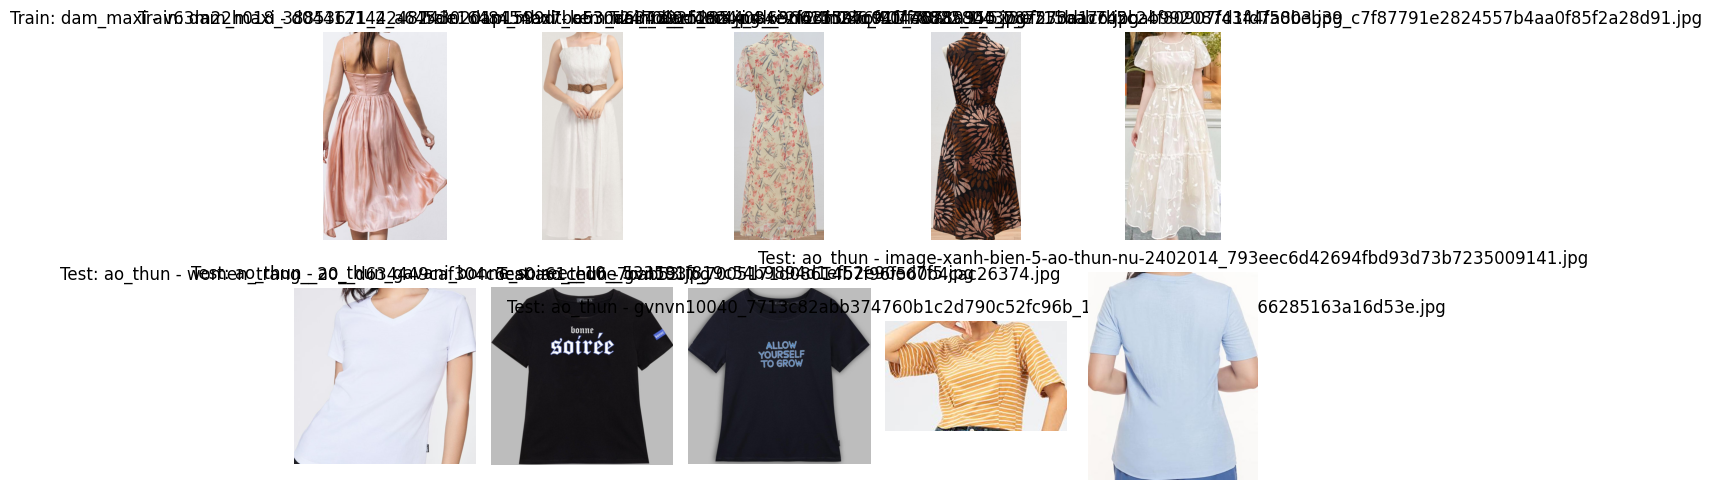

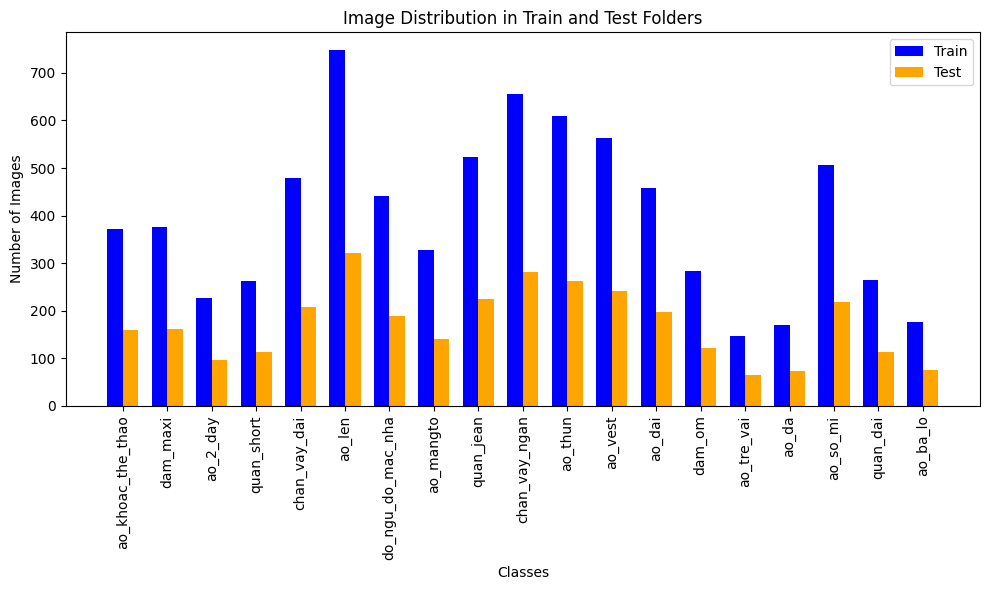

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Function to display a few images from 'train' and 'test' folders
def display_images(data_new_dir, num_images=5):
    # Define the paths for train and test folders
    train_dir = os.path.join(data_new_dir, 'train')
    test_dir = os.path.join(data_new_dir, 'test')

    # Get some random classes from train and test directories
    train_classes = os.listdir(train_dir)
    test_classes = os.listdir(test_dir)

    # Select random classes for displaying images
    train_class = random.choice(train_classes)
    test_class = random.choice(test_classes)

    # Get random images from selected train and test classes
    train_class_images = os.listdir(os.path.join(train_dir, train_class))
    test_class_images = os.listdir(os.path.join(test_dir, test_class))

    random_train_images = random.sample(train_class_images, min(num_images, len(train_class_images)))
    random_test_images = random.sample(test_class_images, min(num_images, len(test_class_images)))

    # Display train images
    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(random_train_images):
        img_path = os.path.join(train_dir, train_class, img_name)
        img = Image.open(img_path)
        plt.subplot(2, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Train: {train_class} - {img_name}")
    
    # Display test images
    for i, img_name in enumerate(random_test_images):
        img_path = os.path.join(test_dir, test_class, img_name)
        img = Image.open(img_path)
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Test: {test_class} - {img_name}")

    plt.tight_layout()
    plt.show()

# Function to plot the graph for image distribution in train and test
def plot_image_distribution(data_new_dir):
    # Define the paths for train and test folders
    train_dir = os.path.join(data_new_dir, 'train')
    test_dir = os.path.join(data_new_dir, 'test')

    # Count the number of images per class for train and test
    train_counts = {}
    test_counts = {}

    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            train_counts[class_name] = len(os.listdir(class_path))

    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            test_counts[class_name] = len(os.listdir(class_path))

    # Create lists for graphing
    classes = list(set(train_counts.keys()).union(set(test_counts.keys())))
    train_values = [train_counts.get(cls, 0) for cls in classes]
    test_values = [test_counts.get(cls, 0) for cls in classes]

    # Plotting the graph
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(classes))

    # Plot bars for train and test image counts
    ax.bar(index, train_values, bar_width, label='Train', color='blue')
    ax.bar([i + bar_width for i in index], test_values, bar_width, label='Test', color='orange')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Number of Images')
    ax.set_title('Image Distribution in Train and Test Folders')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(classes, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Define the path for 'data_new'
data_new_dir = 'data_new'

# Display images from 'train' and 'test'
display_images(data_new_dir, num_images=5)

# Plot the image distribution for 'train' and 'test'
plot_image_distribution(data_new_dir)


In [11]:
import os
import pandas as pd

def count_images_in_classes(data_new_dir):
    # Define the paths for train and test folders
    train_dir = os.path.join(data_new_dir, 'train')
    test_dir = os.path.join(data_new_dir, 'test')

    # Dictionaries to store counts of images for each class in train and test
    train_counts = {}
    test_counts = {}

    # Count the number of images per class in train folder
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):  # Only consider directories
            train_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

    # Count the number of images per class in test folder
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):  # Only consider directories
            test_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

    # Create a DataFrame for better table representation
    classes = list(set(train_counts.keys()).union(set(test_counts.keys())))
    data = {
        'Class': classes,
        'Train Count': [train_counts.get(cls, 0) for cls in classes],
        'Test Count': [test_counts.get(cls, 0) for cls in classes]
    }
    
    df = pd.DataFrame(data)
    return df

# Define the path for 'data_new'
data_new_dir = 'data_new'

# Get the image counts for each class in train and test
df_image_counts = count_images_in_classes(data_new_dir)

# Display the image counts as a table
print(df_image_counts)


                Class  Train Count  Test Count
0   ao_khoac_the_thao          372         160
1            dam_maxi          376         162
2            ao_2_day          226          97
3          quan_short          263         114
4        chan_vay_dai          480         207
5              ao_len          748         321
6   do_ngu_do_mac_nha          441         189
7           ao_mangto          328         141
8           quan_jean          524         225
9       chan_vay_ngan          656         282
10            ao_thun          609         262
11            ao_vest          563         242
12             ao_dai          458         197
13             dam_om          283         122
14         ao_tre_vai          147          64
15              ao_da          169          73
16           ao_so_mi          506         218
17           quan_dai          264         114
18           ao_ba_lo          176          76


In [6]:
# Define the path for 'data_new'
data_new_dir = 'D:/pantio_m_cut_under'

# Get the image counts for each class in train and test
df_image_counts = count_images_in_classes(data_new_dir)

# Display the image counts as a table
print(df_image_counts)

                Class  Train Count  Test Count
0   ao_khoac_the_thao          136          75
1            dam_maxi          136          75
2            ao_2_day          136          75
3          quan_short          136          75
4        chan_vay_dai          136          75
5              ao_len          136          75
6   do_ngu_do_mac_nha          136          75
7           ao_mangto          136          75
8           quan_jean          136          75
9       chan_vay_ngan          136          75
10            ao_thun          136          75
11            ao_vest          136          75
12             ao_dai          136          75
13             dam_om          136          75
14         ao_tre_vai          136          75
15              ao_da          136          75
16           ao_so_mi          136          75
17           quan_dai          136          75
18           ao_ba_lo          136          75


In [1]:
import os
import shutil
import random
from pathlib import Path
from tqdm import tqdm

def random_undersample(src_dir, dest_dir):
    # Define paths for final train and test directories
    final_train_dir = os.path.join(dest_dir, 'train')
    final_test_dir = os.path.join(dest_dir, 'test')
    Path(final_train_dir).mkdir(parents=True, exist_ok=True)
    Path(final_test_dir).mkdir(parents=True, exist_ok=True)

    # Get the minimum number of images in train and test folders for each class
    train_counts = {}
    test_counts = {}

    # Iterate through train directory to calculate minimum for each class
    for class_name in os.listdir(os.path.join(src_dir, 'train')):
        class_train_path = os.path.join(src_dir, 'train', class_name)
        class_test_path = os.path.join(src_dir, 'test', class_name)

        if os.path.isdir(class_train_path) and os.path.isdir(class_test_path):
            train_files = [f for f in os.listdir(class_train_path) if os.path.isfile(os.path.join(class_train_path, f))]
            test_files = [f for f in os.listdir(class_test_path) if os.path.isfile(os.path.join(class_test_path, f))]
            
            train_counts[class_name] = len(train_files)
            test_counts[class_name] = len(test_files)

    # Find the minimum count of images for each class in train and test
    min_train_count = min(train_counts.values())
    min_test_count = min(test_counts.values())

    # Undersample the classes to match the minimum number of images for each class
    for class_name in tqdm(os.listdir(os.path.join(src_dir, 'train')), desc="Undersampling Train Data", unit="class"):
        class_train_path = os.path.join(src_dir, 'train', class_name)
        class_test_path = os.path.join(src_dir, 'test', class_name)

        if os.path.isdir(class_train_path) and os.path.isdir(class_test_path):
            # Get list of images and shuffle
            train_files = [f for f in os.listdir(class_train_path) if os.path.isfile(os.path.join(class_train_path, f))]
            test_files = [f for f in os.listdir(class_test_path) if os.path.isfile(os.path.join(class_test_path, f))]

            # Randomly undersample to match the minimum count
            train_files = random.sample(train_files, min_train_count)
            test_files = random.sample(test_files, min_test_count)

            # Create the final class directories in 'data_final'
            final_class_train_path = os.path.join(final_train_dir, class_name)
            final_class_test_path = os.path.join(final_test_dir, class_name)
            Path(final_class_train_path).mkdir(parents=True, exist_ok=True)
            Path(final_class_test_path).mkdir(parents=True, exist_ok=True)

            # Copy the undersampled images to the final directories
            for img in train_files:
                src_img_path = os.path.join(class_train_path, img)
                shutil.copy(src_img_path, final_class_train_path)

            for img in test_files:
                src_img_path = os.path.join(class_test_path, img)
                shutil.copy(src_img_path, final_class_test_path)

# Define the paths for 'data_new' and the final 'data_final' folder
data_new_dir = 'data_new'
data_final_dir = 'data_final'

# Perform the random undersampling and save to 'data_final'
random_undersample(data_new_dir, data_final_dir)

print("Random undersampling completed and data saved to 'data_final'!")


Undersampling Train Data: 100%|██████████| 19/19 [00:44<00:00,  2.37s/class]

Random undersampling completed and data saved to 'data_final'!


In [3]:
import os

def get_files_in_directory(dir_path):
    file_paths = []
    
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            file_paths.append(os.path.join(root, file))
    
    return file_paths

# Example usage
directory_path = 'D:/pantio_m_cut/test'  # Change this to your directory path
files = get_files_in_directory(directory_path)

print(len(files))  # Prints all file paths in the directory and subdirectories


4195
